In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os, json, math, librosa

import IPython.display as ipd
import librosa.display

import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D

import sklearn.model_selection as sk

from sklearn.model_selection import train_test_split

In [10]:
# get genres

audio_dir = 'data/genres_original/'
audio_files, genres = [], [] 

for genre_dir, _, files in os.walk(audio_dir):
    # get genre
    genre = os.path.basename(genre_dir)
    for name in files:
        wav_file = os.path.join(genre_dir, name) # directory to specific audio file
        if wav_file != '/data/genres_original/jazz/jazz.00054.wav':
            audio_files.append(wav_file)
            genres.append(genre)

In [33]:
# testing audio file
audio_path = audio_files[485]
x , sr = librosa.load(audio_path)
librosa.load(audio_path, sr=None)
ipd.Audio(audio_path)

In [38]:
from PIL import Image as I

# Load the image
image = Image.open('output.png')  # Replace with your image path

# Get dimensions
width, height = image.size

print(f"The image dimensions are {width}x{height} pixels.")

# 432x288 
def resize(path):
    image = I.open(path)
    image = image.resize(432, 288)
    return image


The image dimensions are 795x405 pixels.


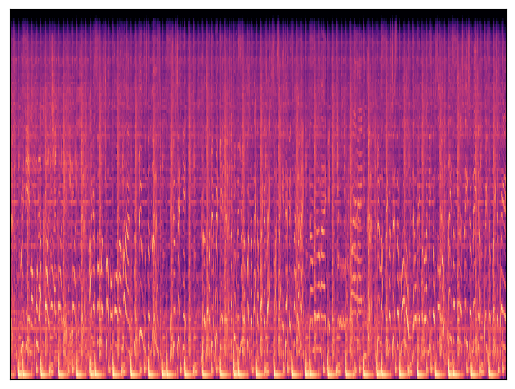

In [37]:
# visualizing audio as mel-spectogram

# load the audio file
audio_signal, sample_rate = librosa.load(audio_path)

# compute mel-spectogram
melSpec = librosa.feature.melspectrogram(y = audio_signal, sr = sample_rate, n_mels = 128)

# convert to logarithmic scale
melSpec_dB = librosa.power_to_db(melSpec, ref=np.max)

# display spectogram
librosa.display.specshow(melSpec_dB, sr = sample_rate, fmax=8000)

In [42]:
from pydub import AudioSegment

def split_audio(path):
    interval = 5*1000  # 5 seconds
    segments = []

    # get audio clip
    audio = AudioSegment.from_file(path)
    
    for i in range(0, len(audio), interval):
        # find end of current segment
        end = i + interval

        # avoid exceeding the file length
        if end >= len(audio): end = len(audio)
        
        # extract segment
        segments.append(audio[i:end])
        
        # # Save the segment to a file
        # segment.export(f'segment_{i//interval}.mp3', format='mp3')
    return segments


print(audio_path)
#split_audio(audio_path)


n = hiphop.00085.wav



SyntaxError: invalid syntax (2239624816.py, line 29)

In [44]:
ogdir = 'data/genres_original/' 

for genre_dir, _, files in os.walk(ogdir):
    print(genre_dir)
    # get genre label
    genre = os.path.basename(genre_dir)

    for file in files:
        segmented_file = split_audio(os.path.join(genre_dir, file))
    



data/genres_original/
data/genres_original/blues


FileNotFoundError: [WinError 2] The system cannot find the file specified

In [ ]:
DATASET_PATH = '../input/gtzan-dataset-music-genre-classification/Data/genres_original/'
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

		# load audio file

                file_path = os.path.join(dirpath, f)
            
                if file_path != '../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00054.wav':

                    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                
                
                    # process all segments of audio file
                    for d in range(num_segments):

                        # calculate start and finish sample for current segment
                        start = samples_per_segment * d
                        finish = start + samples_per_segment

                        # extract mfcc
                        mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                        mfcc = mfcc.T

                        # store only mfcc feature with expected number of vectors
                        if len(mfcc) == num_mfcc_vectors_per_segment:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i-1)
                            print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)